In [1]:
from BakSneppen_PopulationDynamics_Conserved import BakSneppen2D_ConservedPopulation
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# let's first initialise some model parameters

save_folder_base = 'BakSneppen_population_conserved_results'
size = 100
iterations = 10001

New densities in the Bak-Sneppen model are based on:
- the local density (current cell value)
- the average density (average cell values of all neighbours of current cell)
- fitness of our current cell
- random factor

Each of these factors is given a weight (alpha, beta, gamma or delta respectively) that indicates how much it affects the new densities.

The fitness is a superposition of two distribution functions:
- a gaussian function: this prioritizes values that are around the mean of the gaussian
- an exponential: this prioritizes values that are closer to the average of the neighbours

Let's first assume that the new densities are only dependent on the fitness values, and the fitness only consists of the gaussian.

In [3]:
alpha = 0
beta = 0
gamma = 1
delta = 0

labda = 0 # this value does not affect the results, since we ignore the exponential for now
fitness_mean = 0.5
fitness_std = 0.1
gaussian_weight = 1

save_folder = os.path.join(save_folder_base, 'fitness_gaussian')

model = BakSneppen2D_ConservedPopulation(size, save_folder, alpha, beta, gamma, delta, labda, fitness_mean, fitness_std, gaussian_weight)

In [4]:
model.simulate(iterations)

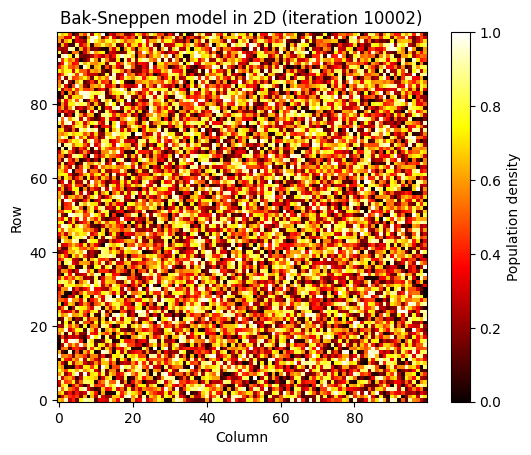

In [5]:
model.plot_system(iterations, close=False)

From the last plot, we see that there is no clustering happening. This also becomes clear when we plot the minimal fitness at each iteration.

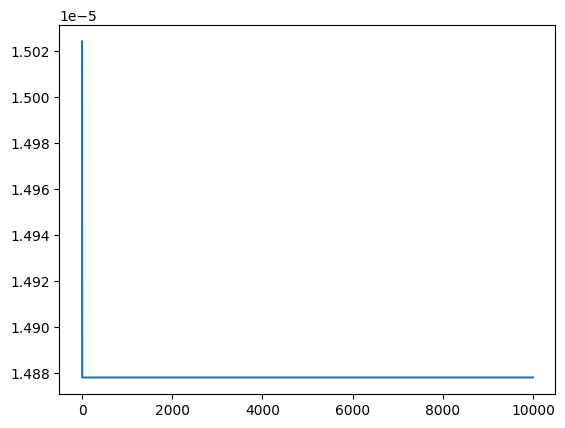

In [6]:
plt.plot(range(iterations), model.min_fitness)
plt.show()

If there would be clustering happening, we would see the minimal fitness value steadily increase until it asymptotically reaches some value. This is in line with the expectations from the Bak-Sneppen model, from which we know that species need a minimal population fitness to survive.

Let's model with some parameter setting that does show clustering.

In [7]:
alpha = 0
beta = 0
gamma = 1
delta = 0

labda = 0 # this value does not affect the results, since we ignore the exponential for now
fitness_mean = 0.5
fitness_std = 0.3
gaussian_weight = 1

save_folder = os.path.join(save_folder_base, 'fitness_gaussian')

model = BakSneppen2D_ConservedPopulation(size, save_folder, alpha, beta, gamma, delta, labda, fitness_mean, fitness_std, gaussian_weight)

In [8]:
model.simulate(iterations)

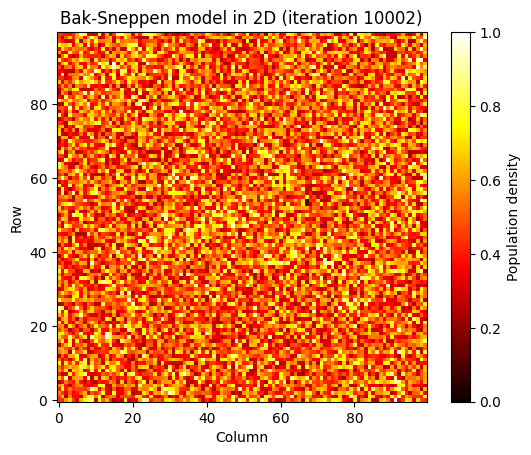

In [9]:
model.plot_system(iterations, close=False)

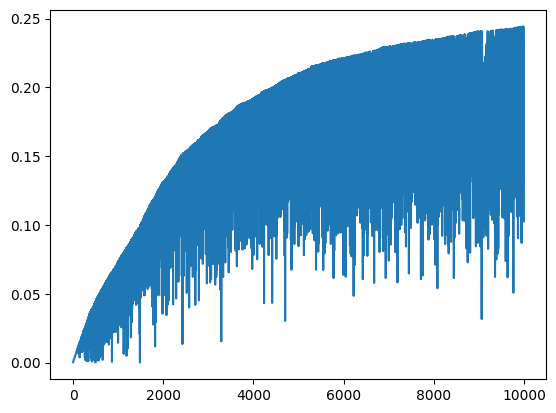

In [10]:
plt.plot(range(iterations), model.min_fitness)
plt.show()

We see that with these settings, clustering appears. Because the mean of the gaussian that we are using as our fitness function is at 0.5, the densities will also move towards this value.

Let's see what the distribution of migrants does in this case.

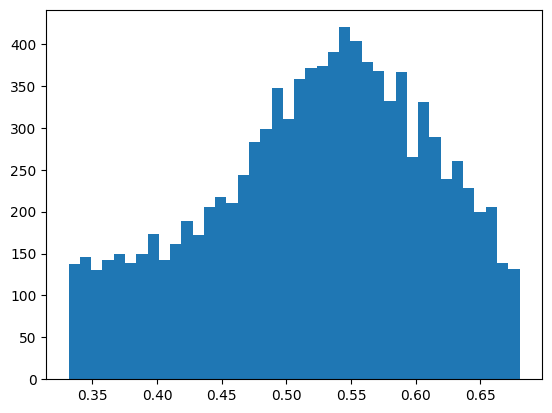

In [11]:
plt.hist(model.migrations, bins=40)
plt.show()

(insert here how to interpret this)

Next we'll add the exponential part of the fitness function. The labda value indicates clustering likelihood, where high values (>1) lead to more clustering

In [12]:
alpha = 0
beta = 0
gamma = 1
delta = 0

labda = 10
fitness_mean = 0.5
fitness_std = 0.3
gaussian_weight = 0.5

save_folder = os.path.join(save_folder_base, 'fitness_gaussian')

model = BakSneppen2D_ConservedPopulation(size, save_folder, alpha, beta, gamma, delta, labda, fitness_mean, fitness_std, gaussian_weight)

In [13]:
model.simulate(iterations)

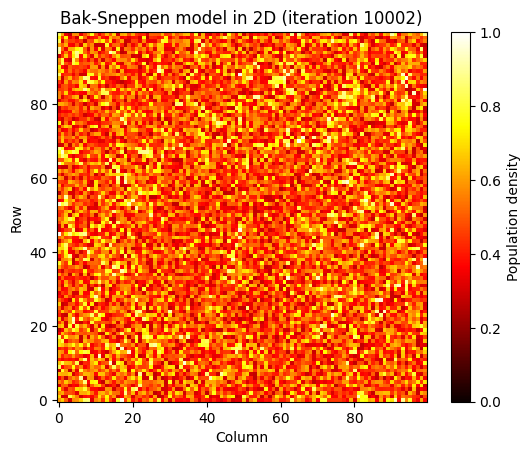

In [14]:
model.plot_system(iterations, close=False)

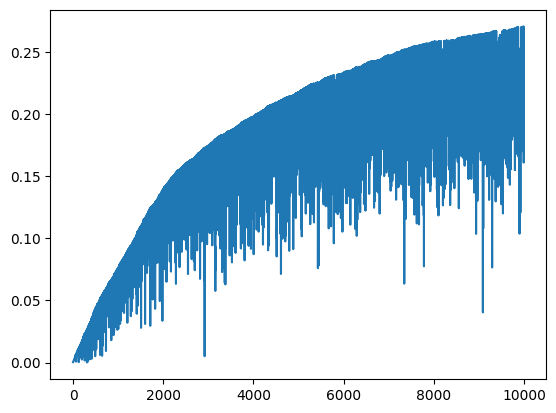

In [15]:
plt.plot(range(iterations), model.min_fitness)
plt.show()

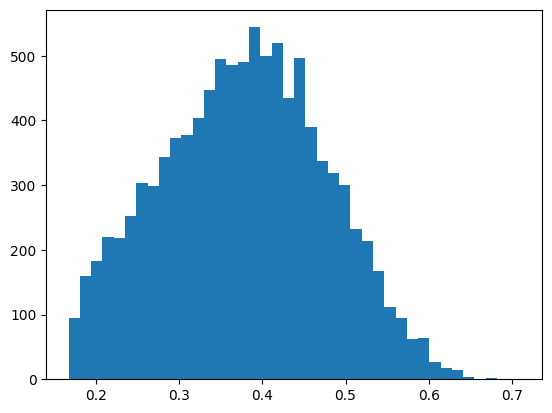

In [16]:
plt.hist(model.migrations, bins=40)
plt.show()